# はじめに

[横向きスタイル](https://github.com/jupyter/notebook/issues/2897)を適用してみた。悪くない感じ。
notebookの幅も9割と十分な幅を持っている。

In [2]:
%%html
<style>
#notebook-container {
    width: 90%;
    background-color: #EEE
}

.code_cell {
   flex-direction: row !important;
}

.code_cell .output_wrapper {
    width: 50%;
    background-color: #FFF
}

.code_cell .input {
    width: 50%;
    background-color: #FFF
}
</style>

系はサンプリング時間で離散化されているとする。
状態方程式は，

観測として位置センサ，速度センサ，加速度センサの3つを考える。
したがって観測行列としてはそれぞれ次のようになる。


In [3]:
% sampling
ST = 0.001;

% Simulation Length
len = 1000
time = 0:ST:ST*(len-1);


len =

        1000




In [4]:
% A matrix
A = [1 ST 0;
    0 1 ST;
    0 0 1];

% C matrix
c1 = [1 0 0]; % position sensor
c2 = [0 1 0]; % vel
c3 = [0 0 1]; % acc

In [6]:
%% Pattern 1: Obserbility Matrix for Each sensor
Mo1_1 = [c1;c1*A;c1*A^2]
Mo1_2 = [c2;c2*A;c2*A^2]
Mo1_3 = [c3;c3*A;c3*A^2]


Mo1_1 =

    1.0000         0         0
    1.0000    0.0010         0
    1.0000    0.0020    0.0000


Mo1_2 =

         0    1.0000         0
         0    1.0000    0.0010
         0    1.0000    0.0020


Mo1_3 =

     0     0     1
     0     0     1
     0     0     1




# はじめに

[横向きスタイル](https://github.com/jupyter/notebook/issues/2897)を適用してみた。悪くない感じ。
notebookの幅も9割と十分な幅を持っている。

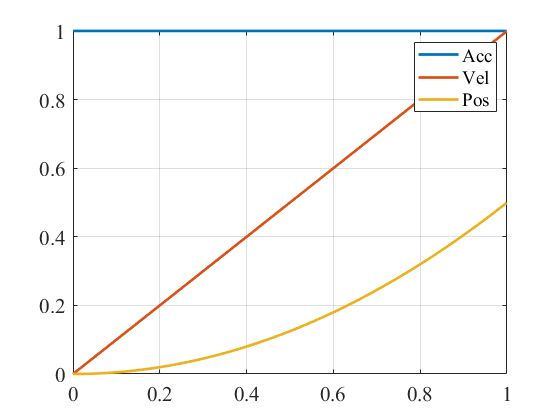

In [7]:
%% make input
Acc0 = 1;
acc = Acc0 * ones(1,len);
vel = Acc0*time;
pos = Acc0/2*time.*time;
figure
plot(time,acc,time,vel,time,pos)
legend('Acc','Vel','Pos')
grid on